In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
! ls

bot_vs_human.ipynb             tweeter_dataset
bots_tweeter.ipynb             user_fake_authentic_2class.csv


In [3]:

data = pd.read_csv('user_fake_authentic_2class.csv', encoding='latin-1') 
data.tail(10)
data.shape

(65326, 18)

In [4]:
# Check columns for NaN values
# data["pos"].isna() 
data["class"].isna().any()

False

In [5]:
# Cleaning data

data = data.rename(columns={"pos": "Num_posts", "flw": "Num_following", "flg": "Num_followers", "bl": "Biography_length", 
                            "pic": "Picture_availability", "lin": "Link_availability", "cl": "Average_caption_len",
                            "cz": "Caption_zero", "ni": "Non-image_perc", "erl": "Engagement_rate_likes",
                            "erc": "Engagement_rate_comm", "lt": "Location_tag_perc", "hc": "Average_hashtag_count",
                            "pr": "Promotional_keywords_in_hashtags", "fo": "Followers_keywords", "cs": "Cosine_similarity",
                            "pi": "Post_interval_in_h", "class": "label"})

display(data)

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_len,Caption_zero,Non-image_perc,Engagement_rate_likes,Engagement_rate_comm,Location_tag_perc,Average_hashtag_count,Promotional_keywords_in_hashtags,Followers_keywords,Cosine_similarity,Post_interval_in_h,label
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,r
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,r
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,r
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,r


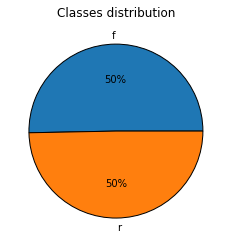

In [6]:
classes = pd.value_counts(data["label"]) 

classes.plot(kind = 'pie',  autopct='%0.f%%') 

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

In [7]:
data["label"]=data["label"].map({'f':1,'r':0}) 
data

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_len,Caption_zero,Non-image_perc,Engagement_rate_likes,Engagement_rate_comm,Location_tag_perc,Average_hashtag_count,Promotional_keywords_in_hashtags,Followers_keywords,Cosine_similarity,Post_interval_in_h,label
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,1
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,1
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,1
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,1
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,0
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,0
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,0
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,0


In [8]:
bots = data[data.label==1]
humans = data[data.label==0]

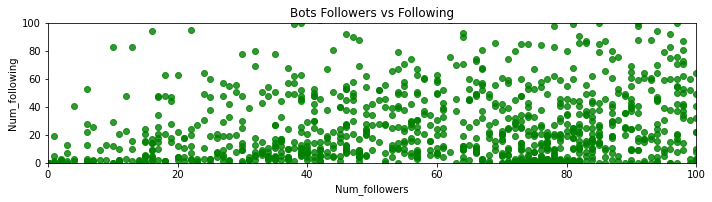

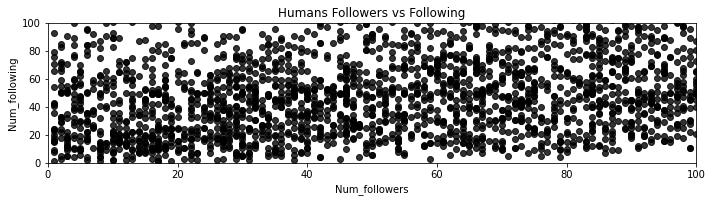

In [9]:
# bots.Num_followers/bots.Num_following

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title("Bots Followers vs Following")
sns.regplot(bots.Num_followers, bots.Num_following, color='green', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title("Humans Followers vs Following")
sns.regplot(humans.Num_followers, humans.Num_following, color='black', label='Humans')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

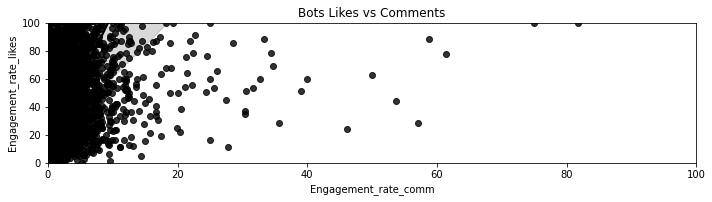

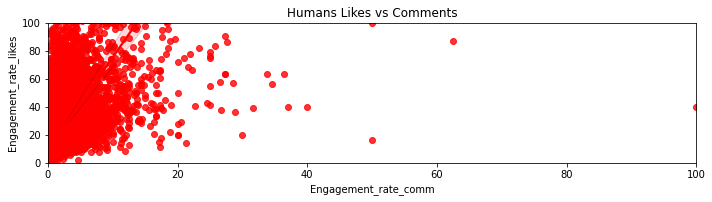

In [10]:

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title("Bots Likes vs Comments")
sns.regplot(bots.Engagement_rate_comm, bots.Engagement_rate_likes, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title("Humans Likes vs Comments")
sns.regplot(humans.Engagement_rate_comm, humans.Engagement_rate_likes, color='red', label='Humans')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [11]:
df = pd.concat([bots, humans])
df.shape

(65326, 18)

In [12]:
df.corr(method='spearman')

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_len,Caption_zero,Non-image_perc,Engagement_rate_likes,Engagement_rate_comm,Location_tag_perc,Average_hashtag_count,Promotional_keywords_in_hashtags,Followers_keywords,Cosine_similarity,Post_interval_in_h,label
Num_posts,1.000000,0.621458,0.110445,0.452357,0.300308,0.394458,0.558946,-0.097518,0.388576,-0.289403,-0.240630,0.301507,0.363428,0.194491,0.156464,-0.046388,0.150711,-0.168593
Num_following,0.621458,1.000000,0.410313,0.393325,0.214694,0.366031,0.403892,-0.122583,0.309063,-0.311996,-0.280282,0.307014,0.264691,0.098590,0.108334,-0.119954,0.214569,-0.176182
Num_followers,0.110445,0.410313,1.000000,0.054576,-0.077156,0.018615,-0.078994,0.108688,-0.023741,-0.201883,-0.227611,-0.075381,-0.071297,-0.030075,-0.010523,0.146305,-0.074810,0.360853
Biography_length,0.452357,0.393325,0.054576,1.000000,0.200419,0.502511,0.506578,-0.277114,0.220901,-0.079410,-0.103144,0.281548,0.374538,0.056789,0.133774,-0.052724,0.050695,-0.300380
Picture_availability,0.300308,0.214694,-0.077156,0.200419,1.000000,0.124227,0.259457,0.114958,0.183306,0.181013,0.181821,0.167580,0.178189,0.064200,0.072916,-0.165978,0.254386,-0.169713
Link_availability,0.394458,0.366031,0.018615,0.502511,0.124227,1.000000,0.385219,-0.233914,0.177825,-0.189079,-0.234502,0.216537,0.253091,0.027919,0.058706,0.021882,-0.011869,-0.368177
Average_caption_len,0.558946,0.403892,-0.078994,0.506578,0.259457,0.385219,1.000000,-0.480940,0.333674,-0.048465,-0.015534,0.305048,0.612128,0.325228,0.279730,-0.219891,0.184515,-0.255228
Caption_zero,-0.097518,-0.122583,0.108688,-0.277114,0.114958,-0.233914,-0.480940,1.000000,-0.065357,0.234052,0.199670,-0.148415,-0.341022,-0.099256,-0.121194,0.121426,0.150118,0.178474
Non-image_perc,0.388576,0.309063,-0.023741,0.220901,0.183306,0.177825,0.333674,-0.065357,1.000000,0.019154,0.047390,0.332663,0.237161,0.072377,0.095915,-0.198847,0.273037,-0.204234
Engagement_rate_likes,-0.289403,-0.311996,-0.201883,-0.079410,0.181013,-0.189079,-0.048465,0.234052,0.019154,1.000000,0.838367,0.147616,0.048515,-0.126867,0.036061,-0.389784,0.299943,-0.295273


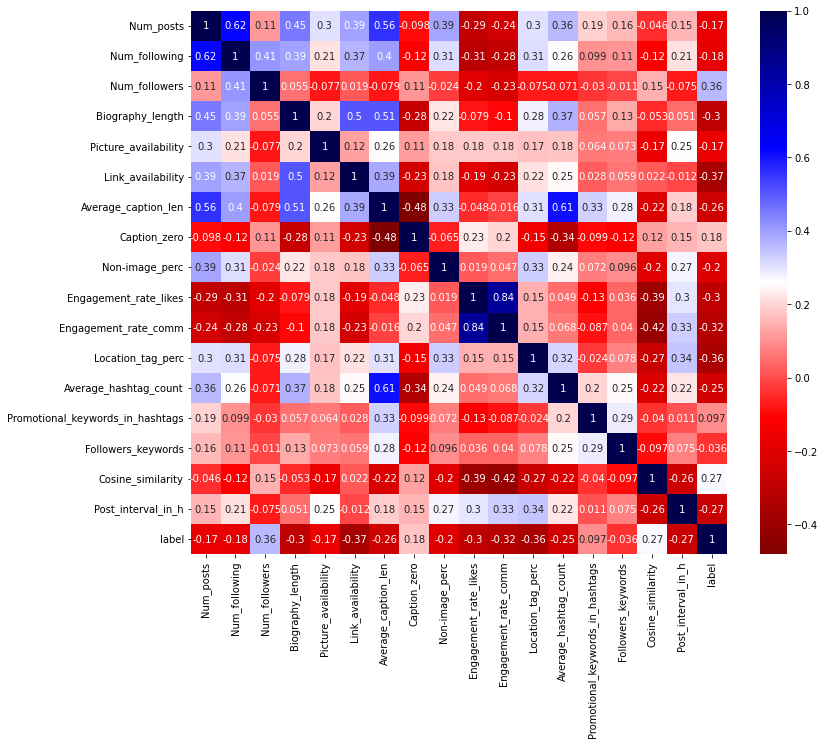

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='spearman'), cmap="seismic_r", annot=True)
plt.tight_layout
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [15]:
data2 = data.drop('label', axis=1)
X = data2.values
display(X, X.shape)

array([[4.40000000e+01, 4.80000000e+01, 3.25000000e+02, ...,
        0.00000000e+00, 1.11111000e-01, 9.49850008e-02],
       [1.00000000e+01, 6.60000000e+01, 3.21000000e+02, ...,
        0.00000000e+00, 2.06826001e-01, 2.30412857e+02],
       [3.30000000e+01, 9.70000000e+02, 3.08000000e+02, ...,
        5.60000017e-02, 5.72174013e-01, 4.35699387e+01],
       ...,
       [1.50000000e+03, 3.70000000e+03, 3.20000000e+03, ...,
        5.60000017e-02, 5.89080006e-02, 1.29802048e+02],
       [3.29000000e+02, 1.50000000e+03, 1.80000000e+03, ...,
        0.00000000e+00, 1.03174001e-01, 5.34028397e+01],
       [2.06000000e+02, 6.59000000e+02, 6.08000000e+02, ...,
        1.66999996e-01, 1.75049994e-02, 6.04981445e+02]])

(65326, 17)

In [16]:
data2

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_len,Caption_zero,Non-image_perc,Engagement_rate_likes,Engagement_rate_comm,Location_tag_perc,Average_hashtag_count,Promotional_keywords_in_hashtags,Followers_keywords,Cosine_similarity,Post_interval_in_h
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840


In [17]:
y = data['label'].values
display(y, y.shape)

array([1, 1, 1, ..., 0, 0, 0])

(65326,)

In [18]:
#Splitting data: X_train - one half of data to predict labels, X_test - other half of data, y_train - true labels to train the model,
# y_test - labels to test the data, to test the accuracy between the actual and predicted classes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
#Decision Tree Classifier

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)
dt = dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

print("Training Accuracy DT: %.5f" %accuracy_score(y_train, y_pred_train_dt)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy DT: %.5f" %accuracy_score(y_test, y_pred_test_dt))

Training Accuracy DT: 0.90078
Test Accuracy DT: 0.88011


In [20]:
#Getting scores of class probabilities
scores_train_dt = dt.predict_proba(X_train)
scores_test_dt = dt.predict_proba(X_test)

# print(scores_train_dt, len(scores_train_dt))
# print(scores_test_dt, len(scores_test_dt))

# print(scores_train_dt[1][1])

#To extract scores of probabilities for class 1 (bot)
y_scores_train_dt = list()
y_scores_test_dt = list()

for i in range(len(scores_train_dt)):
    y_scores_train_dt.append(scores_train_dt[i][1])

for i in range(len(scores_test_dt)):
    y_scores_test_dt.append(scores_test_dt[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train_dt, pos_label=1) 
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test_dt, pos_label=1)

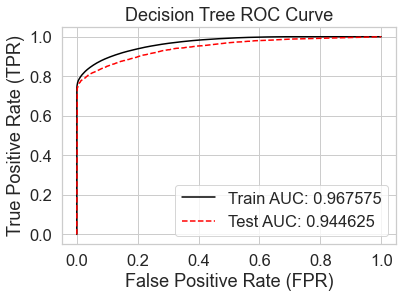

In [21]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_dt_train, tpr_dt_train, color="black", label="Train AUC: %f" %auc(fpr_dt_train, tpr_dt_train)) # %f - string formating - show floating number
plt.plot(fpr_dt_test, tpr_dt_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [22]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print("Training Accuracy RF: %.5f" %accuracy_score(y_train, y_pred_train_rf)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy RF: %.5f" %accuracy_score(y_test, y_pred_test_rf))

Training Accuracy RF: 1.00000
Test Accuracy RF: 0.89438


In [24]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy').mean()

0.891256644081896

In [25]:
# Pruning to avoid overfitting
rf = RandomForestClassifier(ccp_alpha=0.001)
rf = rf.fit(X_train, y_train)
cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy').mean()

0.8836032015679068

In [26]:
#Getting scores of class probabilities
scores_train_rf = rf.predict_proba(X_train)
scores_test_rf = rf.predict_proba(X_test)


#To extract scores of probabilities for class 1 (bot)
y_scores_train_rf = list()
y_scores_test_rf = list()

for i in range(len(scores_train_rf)):
    y_scores_train_rf.append(scores_train_rf[i][1])

for i in range(len(scores_test_rf)):
    y_scores_test_rf.append(scores_test_rf[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train_rf, pos_label=1) 
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test_rf, pos_label=1)

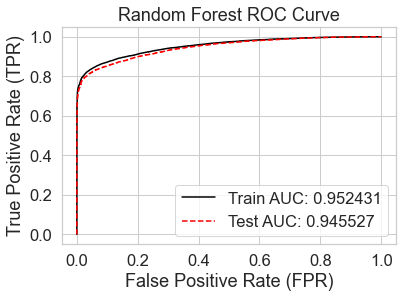

In [27]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_rf_train, tpr_rf_train, color="black", label="Train AUC: %f" %auc(fpr_rf_train, tpr_rf_train)) # %f - string formating - show floating number
plt.plot(fpr_rf_test, tpr_rf_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
#Logistic Regression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

print("Training Accuracy LR: %.5f" %accuracy_score(y_train, y_pred_train_lr)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy LR: %.5f" %accuracy_score(y_test, y_pred_test_lr))

Training Accuracy LR: 0.76485
Test Accuracy LR: 0.77027


In [30]:
#Getting scores of class probabilities
scores_train_lr = lr.predict_proba(X_train)
scores_test_lr = lr.predict_proba(X_test)


#To extract scores of probabilities for class 1 (bot)
y_scores_train_lr = list()
y_scores_test_lr = list()

for i in range(len(scores_train_lr)):
    y_scores_train_lr.append(scores_train_lr[i][1])

for i in range(len(scores_test_lr)):
    y_scores_test_lr.append(scores_test_lr[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, y_scores_train_lr, pos_label=1) 
fpr_lr_test, tpr_lr_test, _ = roc_curve(y_test, y_scores_test_lr, pos_label=1)


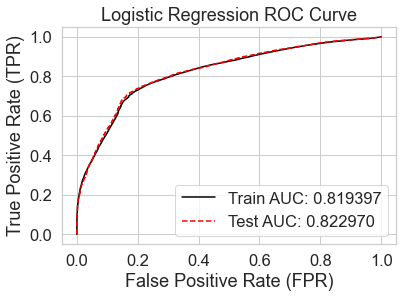

In [31]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_lr_train, tpr_lr_train, color="black", label="Train AUC: %f" %auc(fpr_lr_train, tpr_lr_train)) # %f - string formating - show floating number
plt.plot(fpr_lr_test, tpr_lr_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_lr_test, tpr_lr_test))
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [32]:
# Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, y_train)
y_pred_train_lda = lda.predict(X_train)
y_pred_test_lda = lda.predict(X_test)

print("Training Accuracy LDA: %.5f" %accuracy_score(y_train, y_pred_train_lda)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy LDA: %.5f" %accuracy_score(y_test, y_pred_test_lda))

Training Accuracy LDA: 0.80332
Test Accuracy LDA: 0.80321


In [33]:
#Getting scores of class probabilities
scores_train_lda = lda.predict_proba(X_train)
scores_test_lda = lda.predict_proba(X_test)


#To extract scores of probabilities for class 1 (bot)
y_scores_train_lda = list()
y_scores_test_lda = list()

for i in range(len(scores_train_lda)):
    y_scores_train_lda.append(scores_train_lda[i][1])

for i in range(len(scores_test_lda)):
    y_scores_test_lda.append(scores_test_lda[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_lda_train, tpr_lda_train, _ = roc_curve(y_train, y_scores_train_lda, pos_label=1) 
fpr_lda_test, tpr_lda_test, _ = roc_curve(y_test, y_scores_test_lda, pos_label=1)


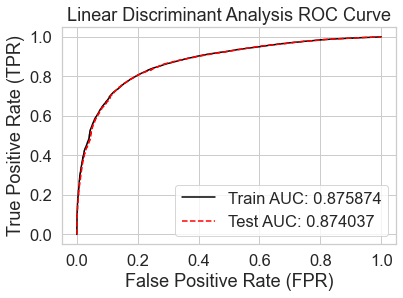

In [34]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_lda_train, tpr_lda_train, color="black", label="Train AUC: %f" %auc(fpr_lda_train, tpr_lda_train)) # %f - string formating - show floating number
plt.plot(fpr_lda_test, tpr_lda_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_lda_test, tpr_lda_test))
plt.title("Linear Discriminant Analysis ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [35]:
# K-Nearest Neighbors Classifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

print("Training Accuracy KNN: %.5f" %accuracy_score(y_train, y_pred_train_knn)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy KNN: %.5f" %accuracy_score(y_test, y_pred_test_knn))

Training Accuracy KNN: 0.82588
Test Accuracy KNN: 0.74792


In [36]:
#Getting scores of class probabilities
scores_train_knn = knn.predict_proba(X_train)
scores_test_knn = knn.predict_proba(X_test)


#To extract scores of probabilities for class 1 (bot)
y_scores_train_knn = list()
y_scores_test_knn = list()

for i in range(len(scores_train_knn)):
    y_scores_train_knn.append(scores_train_knn[i][1])

for i in range(len(scores_test_knn)):
    y_scores_test_knn.append(scores_test_knn[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_knn_train, tpr_knn_train, _ = roc_curve(y_train, y_scores_train_knn, pos_label=1) 
fpr_knn_test, tpr_knn_test, _ = roc_curve(y_test, y_scores_test_knn, pos_label=1)


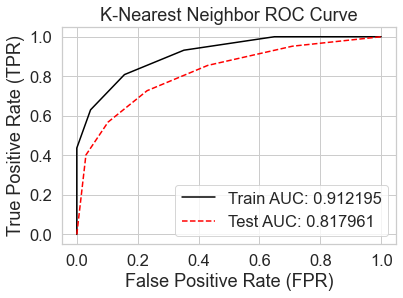

In [37]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_knn_train, tpr_knn_train, color="black", label="Train AUC: %f" %auc(fpr_knn_train, tpr_knn_train)) # %f - string formating - show floating number
plt.plot(fpr_knn_test, tpr_knn_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_knn_test, tpr_knn_test))
plt.title("K-Nearest Neighbor ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [38]:
# Naive Bayes Classifier

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

print("Training Accuracy NB: %.5f" %accuracy_score(y_train, y_pred_train_nb)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy NB: %.5f" %accuracy_score(y_test, y_pred_test_nb))

Training Accuracy NB: 0.65967
Test Accuracy NB: 0.66250


In [39]:
#Getting scores of class probabilities
scores_train_nb = nb.predict_proba(X_train)
scores_test_nb = nb.predict_proba(X_test)


#To extract scores of probabilities for class 1 (bot)
y_scores_train_nb = list()
y_scores_test_nb = list()

for i in range(len(scores_train_nb)):
    y_scores_train_nb.append(scores_train_nb[i][1])

for i in range(len(scores_test_nb)):
    y_scores_test_nb.append(scores_test_nb[i][1]) 

# Metrics of False Positive Rate and True Positive Rate (_ -> thresholds on the decision function used to compute fpr and tpr)
fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train, y_scores_train_nb, pos_label=1) 
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test, y_scores_test_nb, pos_label=1)


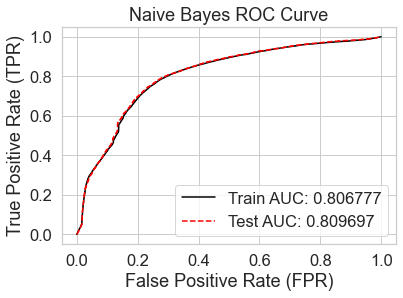

In [40]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_nb_train, tpr_nb_train, color="black", label="Train AUC: %f" %auc(fpr_nb_train, tpr_nb_train)) # %f - string formating - show floating number
plt.plot(fpr_nb_test, tpr_nb_test, color="red", ls="--", label="Test AUC: %f" %auc(fpr_nb_test, tpr_nb_test))
plt.title("Naive Bayes ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

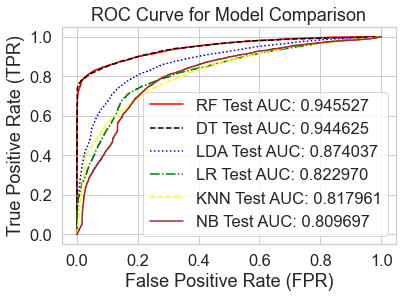

In [64]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axis_grid': False})

#Compute and draw area under the curve (AUC)
plt.plot(fpr_rf_test, tpr_rf_test, color="red", label="RF Test AUC: %f" %auc(fpr_rf_test, tpr_rf_test))
plt.plot(fpr_dt_test, tpr_dt_test, color="black", ls="--", label="DT Test AUC: %f" %auc(fpr_dt_test, tpr_dt_test))
plt.plot(fpr_lda_test, tpr_lda_test, color="blue", ls=":", label="LDA Test AUC: %f" %auc(fpr_lda_test, tpr_lda_test))
plt.plot(fpr_lr_test, tpr_lr_test, color="green", ls="-.", label="LR Test AUC: %f" %auc(fpr_lr_test, tpr_lr_test))
plt.plot(fpr_knn_test, tpr_knn_test, color="yellow", ls="--", label="KNN Test AUC: %f" %auc(fpr_knn_test, tpr_knn_test))
plt.plot(fpr_nb_test, tpr_nb_test, color="brown", label="NB Test AUC: %f" %auc(fpr_nb_test, tpr_nb_test))
plt.title("ROC Curve for Model Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [42]:
print("Decision Tree accuracy score: {}".format(accuracy_score(y_test, y_pred_test_dt)))
print("Random Forest accuracy score: {}".format(accuracy_score(y_test, y_pred_test_rf)))
print("Logistic Regression accuracy score: {}".format(accuracy_score(y_test, y_pred_test_lr)))
print("Linear Discriminant Analysis accuracy score: {}".format(accuracy_score(y_test, y_pred_test_lda)))
print("Naive Bayes accuracy score: {}".format(accuracy_score(y_test, y_pred_test_nb)))
print("K-Nearest Neighbor accuracy score: {}".format(accuracy_score(y_test, y_pred_test_knn)))

Decision Tree accuracy score: 0.8801126622581436
Random Forest accuracy score: 0.8946240509429341
Logistic Regression accuracy score: 0.7702669605682096
Linear Discriminant Analysis accuracy score: 0.8032084251775655
Naive Bayes accuracy score: 0.6625030614744061
K-Nearest Neighbor accuracy score: 0.7479181974038697


In [45]:
from sklearn.metrics import mean_squared_error

print("Decision Tree error: {}".format(mean_squared_error(y_test, y_pred_test_dt)))
print("Random Forest error: {}".format(mean_squared_error(y_test, y_pred_test_rf)))
print("Logistic Regression error: {}".format(mean_squared_error(y_test, y_pred_test_lr)))
print("Linear Discriminant Analysis error: {}".format(mean_squared_error(y_test, y_pred_test_lda)))
print("Naive Bayes error: {}".format(mean_squared_error(y_test, y_pred_test_nb)))
print("K-Nearest Neighbor error: {}".format(mean_squared_error(y_test, y_pred_test_knn)))

Decision Tree error: 0.11988733774185648
Random Forest error: 0.10537594905706588
Logistic Regression error: 0.22973303943179035
Linear Discriminant Analysis error: 0.19679157482243448
Naive Bayes error: 0.3374969385255939
K-Nearest Neighbor error: 0.2520818025961303


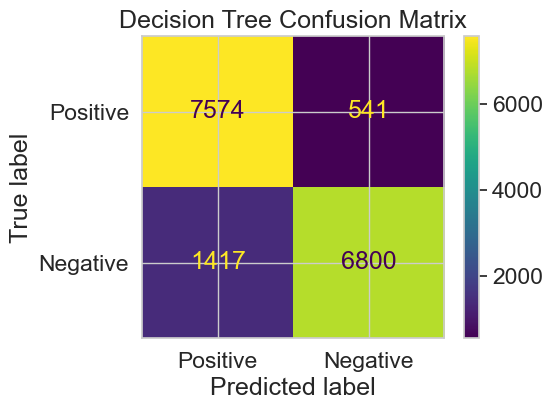

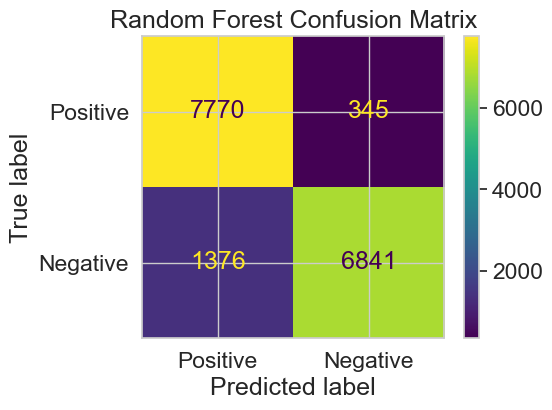

In [80]:
#Confusion Matrix Display for Decision Tree and Random Forest

fig, ax = plt.subplots(figsize=(5,4), dpi=100)
cm = confusion_matrix(y_test, y_pred_test_dt)
cmp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
plt.title("Decision Tree Confusion Matrix")
cmp.plot(ax=ax)


fig, ax = plt.subplots(figsize=(5,4), dpi=100)
cm = confusion_matrix(y_test, y_pred_test_rf)
cmp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
plt.title("Random Forest Confusion Matrix")
cmp.plot(ax=ax)


In [89]:
print(classification_report(y_test, y_pred_test_dt))
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      8115
           1       0.93      0.83      0.87      8217

    accuracy                           0.88     16332
   macro avg       0.88      0.88      0.88     16332
weighted avg       0.88      0.88      0.88     16332

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8115
           1       0.95      0.83      0.89      8217

    accuracy                           0.89     16332
   macro avg       0.90      0.90      0.89     16332
weighted avg       0.90      0.89      0.89     16332



In [64]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import Ridge

rfecv = RFECV(estimator=Ridge(), cv=5) #Recursive Feature Elimination with cross-validation
rfecv = rfecv.fit(X_train, y_train)
X_train_rfecv = rfecv.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_rfecv.shape: {}".format(X_train_rfecv.shape))

X_train.shape: (48994, 17)
X_train_rfecv.shape: (48994, 17)


In [63]:
rfe = RFE(estimator=Ridge()) # Recursive Feature Elimination without cross-validation
rfe = rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_rfe.shape: {}".format(X_train_rfe.shape))

X_train.shape: (48994, 17)
X_train_rfe.shape: (48994, 8)


In [67]:
#Random Forest with selected features
X_test_rfe = rfe.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Scores with all features: {:,.3f}".format(rf.score(X_test, y_test)))

rf.fit(X_train_rfe, y_train)
print("Scores with selected features: {:,.3f}".format(rf.score(X_test_rfe, y_test)))

Scores with all features: 0.897
Scores with selected features: 0.723


In [68]:
#K-Nearest Neighbor with selected features

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Scores with all features: {:,.3f}".format(knn.score(X_test, y_test)))

knn.fit(X_train_rfe, y_train)
print("Scores with selected features: {:,.3f}".format(knn.score(X_test_rfe, y_test)))

Scores with all features: 0.748
Scores with selected features: 0.710


In [92]:
from sklearn.ensemble import ExtraTreesClassifier

clf = DecisionTreeClassifier()
scores_train = cross_val_score(clf, X_train, y_train, cv=5)
scores_test = cross_val_score(clf, X_test, y_test, cv=5)
print(scores_train.mean())
print(scores_test.mean())

clf = RandomForestClassifier()
scores_train = cross_val_score(clf, X_train, y_train, cv=5)
scores_test = cross_val_score(clf, X_test, y_test, cv=5)
print(scores_train.mean())
print(scores_test.mean())

clf = ExtraTreesClassifier()
scores_train = cross_val_score(clf, X_train, y_train, cv=5)
scores_test = cross_val_score(clf, X_test, y_test, cv=5)
print(scores_train.mean())
print(scores_test.mean())

0.8576968114417196
0.8471104745613458
0.9007224368825435
0.8911957444886243
0.8792708392766875
0.8636422680290632


In [90]:
# Extra Trees Classifier
et = ExtraTreesClassifier()
et = et.fit(X_train, y_train)
y_pred_train_et = et.predict(X_train)
y_pred_test_et = et.predict(X_test)

print("Training Accuracy ET: %.5f" %accuracy_score(y_train, y_pred_train_et)) #%.5f string formating - to show 5 digits after decimal point
print("Test Accuracy ET: %.5f" %accuracy_score(y_test, y_pred_test_et))

Training Accuracy ET: 1.00000
Test Accuracy ET: 0.87546
